## Task 1. Data Structures. Sorting. Working with a Singly Linked List

To implement a singly linked list (an implementation example can be taken from the lecture notes), you need to:

Write a function that implements the reversal of a singly linked list, modifying references between nodes.
Develop a sorting algorithm for a singly linked list, such as insertion sort or merge sort.
Write a function that merges two sorted singly linked lists into one sorted list.

In [2]:
class ListNode:
    def __init__(self, value):
        self.value = value
        self.next_node = None

class LinkedList:
    def __init__(self):
        self.head_node = None

    def add(self, value):
        new_node = ListNode(value)
        new_node.next_node = self.head_node
        self.head_node = new_node

    def reverse_list(self):
        previous = None
        current = self.head_node
        while current:
            next_temp = current.next_node
            current.next_node = previous
            previous = current
            current = next_temp
        self.head_node = previous

    def sort_list(self):
        sorted_head = None
        current = self.head_node
        while current:
            next_temp = current.next_node
            sorted_head = self.insert_sorted(sorted_head, current)
            current = next_temp
        self.head_node = sorted_head

    def insert_sorted(self, head, node_to_insert):
        current = head
        if not head or head.value >= node_to_insert.value:
            node_to_insert.next_node = head
            head = node_to_insert
        else:
            while current.next_node and current.next_node.value < node_to_insert.value:
                current = current.next_node
            node_to_insert.next_node = current.next_node
            current.next_node = node_to_insert
        return head

    def merge_lists(self, list1, list2):
        dummy = ListNode(0)
        tail = dummy
        while list1 and list2:
            if list1.value < list2.value:
                tail.next_node = list1
                list1 = list1.next_node
            else:
                tail.next_node = list2
                list2 = list2.next_node
            tail = tail.next_node
        tail.next_node = list1 if list1 else list2
        return dummy.next_node

    def display(self):
        current = self.head_node
        while current:
            print(current.value, end=" -> ")
            current = current.next_node
        print("None")

# Example usage
linked_list = LinkedList()
linked_list.add(10)
linked_list.add(20)
linked_list.add(30)
print("Original list:")
linked_list.display()

linked_list.reverse_list()
print("Reversed list:")
linked_list.display()

linked_list.sort_list()
print("Sorted list:")
linked_list.display()

# Merging two sorted lists
list1 = LinkedList()
list1.add(10)
list1.add(30)
list1.add(50)

list2 = LinkedList()
list2.add(20)
list2.add(40)
list2.add(60)

merged_list = LinkedList()
merged_list.head_node = merged_list.merge_lists(list1.head_node, list2.head_node)
print("Merged sorted list:")
merged_list.display()

Original list:
30 -> 20 -> 10 -> None
Reversed list:
10 -> 20 -> 30 -> None
Sorted list:
10 -> 20 -> 30 -> None
Merged sorted list:
50 -> 30 -> 10 -> 60 -> 40 -> 20 -> None


## Task 2. Recursion. Creating the "Pythagorean Tree" Fractal Using Recursion

You need to write a Python program that uses recursion to create the "Pythagorean Tree" fractal. The program should visualize the "Pythagorean Tree" fractal, and the user should be able to specify the recursion level.

In [4]:
import turtle
import math

def draw_tree(depth, size):
    if depth == 0:
        turtle.forward(size)
        turtle.backward(size)
        return

    # Draw the main trunk
    turtle.forward(size)

    # Draw the left branch
    turtle.left(45)
    draw_tree(depth - 1, size * math.sqrt(2) / 2)
    turtle.right(45)

    # Draw the right branch
    turtle.right(45)
    draw_tree(depth - 1, size * math.sqrt(2) / 2)
    turtle.left(45)

    # Return to the original position
    turtle.backward(size)

# Initial turtle setup
turtle.speed('fastest')
turtle.left(90)  # Pointing the turtle upward
turtle.color("green")

# Draw the Pythagorean tree
draw_tree(5, 100)  # Example: depth 5, size 100

# Finish the drawing
turtle.done()

## Task 3. Trees, Dijkstra's Algorithm

Develop Dijkstra's algorithm to find the shortest paths in a weighted graph using a binary heap. The task includes creating a graph, using a heap to optimize the selection of vertices, and calculating the shortest paths from the initial vertex to all others.

In [6]:
import heapq

class Network:
    def __init__(self):
        self.connections = {}

    def add_connection(self, start_node, end_node, weight):
        if start_node not in self.connections:
            self.connections[start_node] = []
        self.connections[start_node].append((end_node, weight))

    def dijkstra_algorithm(self, start):
        shortest_distances = {start: (None, 0)}
        priority_queue = [(0, start)]
        heapq.heapify(priority_queue)

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_distance > shortest_distances[current_node][1]:
                continue

            for neighbor, weight in self.connections.get(current_node, []):
                distance = current_distance + weight
                if neighbor not in shortest_distances or distance < shortest_distances[neighbor][1]:
                    shortest_distances[neighbor] = (current_node, distance)
                    heapq.heappush(priority_queue, (distance, neighbor))

        return shortest_distances

# Example usage
network = Network()
network.add_connection('A', 'B', 1)
network.add_connection('B', 'C', 2)
network.add_connection('A', 'C', 4)
network.add_connection('C', 'D', 1)

shortest_distances = network.dijkstra_algorithm('A')
print(shortest_distances)

{'A': (None, 0), 'B': ('A', 1), 'C': ('B', 3), 'D': ('C', 4)}


## Task 4. Visualization of the Heap

The following code constructs binary trees. Analyze the code to understand how it works.Using this code as a base, build a function to visualize the binary heap

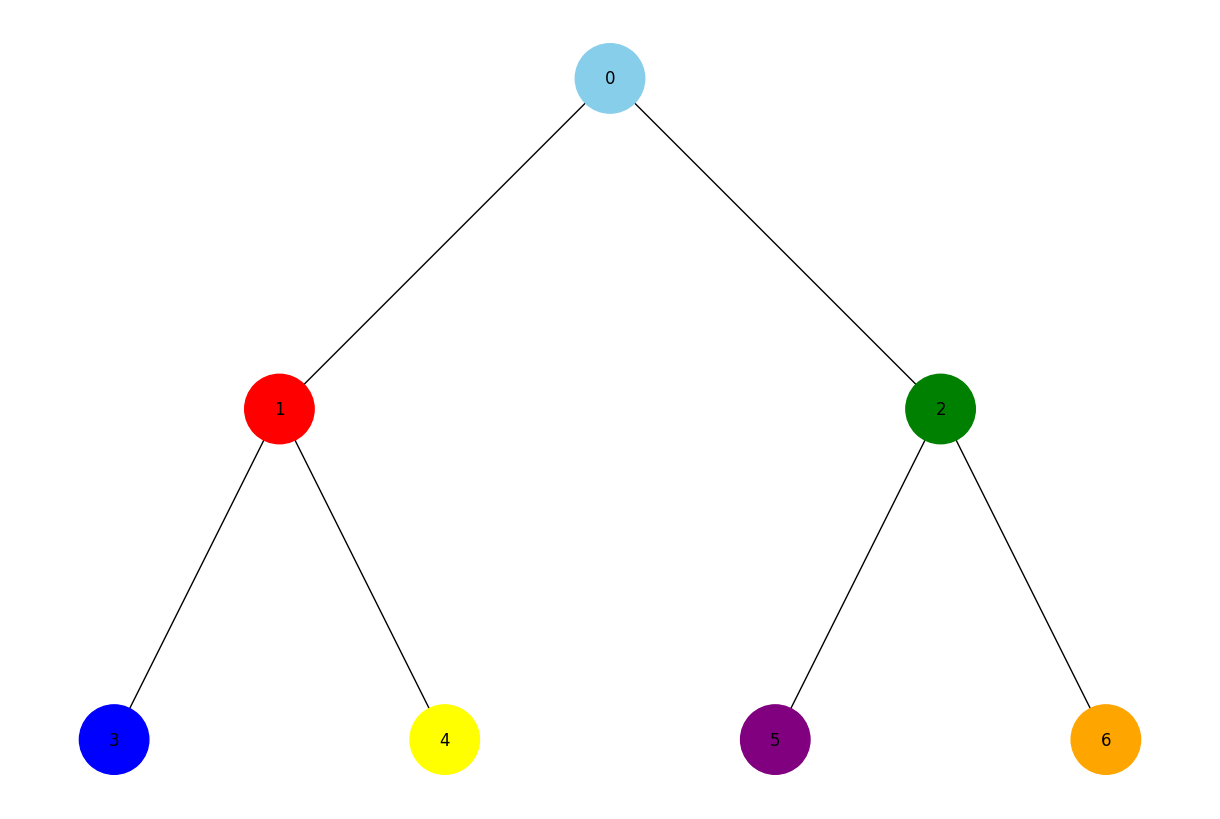

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value, color="skyblue"):
        self.left_child = None
        self.right_child = None
        self.value = value
        self.color = color  # Additional argument to store the color of the node

def build_graph(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.value, pos=(x, y), layer=layer, color=node.color)
        if node.left_child is not None:
            graph.add_edge(node.value, node.left_child.value)
            left_shift = 1 / layer
            build_graph(graph, node.left_child, pos, x-left_shift, y-1, layer+1)
        if node.right_child is not None:
            graph.add_edge(node.value, node.right_child.value)
            right_shift = 1 / layer
            build_graph(graph, node.right_child, pos, x+right_shift, y-1, layer+1)
    return graph

def visualize_tree(tree_root):
    graph = nx.DiGraph()
    pos = {}
    tree = build_graph(graph, tree_root, pos)

    node_colors = [node[1]['color'] for node in tree.nodes(data=True)]

    plt.figure(figsize=(12, 8))
    nx.draw(tree, pos=nx.get_node_attributes(tree, 'pos'), with_labels=True, arrows=False, node_size=2500, node_color=node_colors)
    plt.show()

# Creating the tree structure
root = TreeNode(0)
root.left_child = TreeNode(1, "red")
root.right_child = TreeNode(2, "green")
root.left_child.left_child = TreeNode(3, "blue")
root.left_child.right_child = TreeNode(4, "yellow")
root.right_child.left_child = TreeNode(5, "purple")
root.right_child.right_child = TreeNode(6, "orange")

# Displaying the tree structure
visualize_tree(root)

## Task 5. Visualization of Binary Tree Traversal

Using the code from task 4 to construct a binary tree, it is necessary to create a Python program that visualizes tree traversals in-depth and breadth-first.

The program should display each step in nodes with different colors, using the RGB 16-system (example #1296F0). Depending on the traversal sequence, node colors should change from dark to light shades. Each node, when visited, should receive a unique color that visually reflects the traversal order.

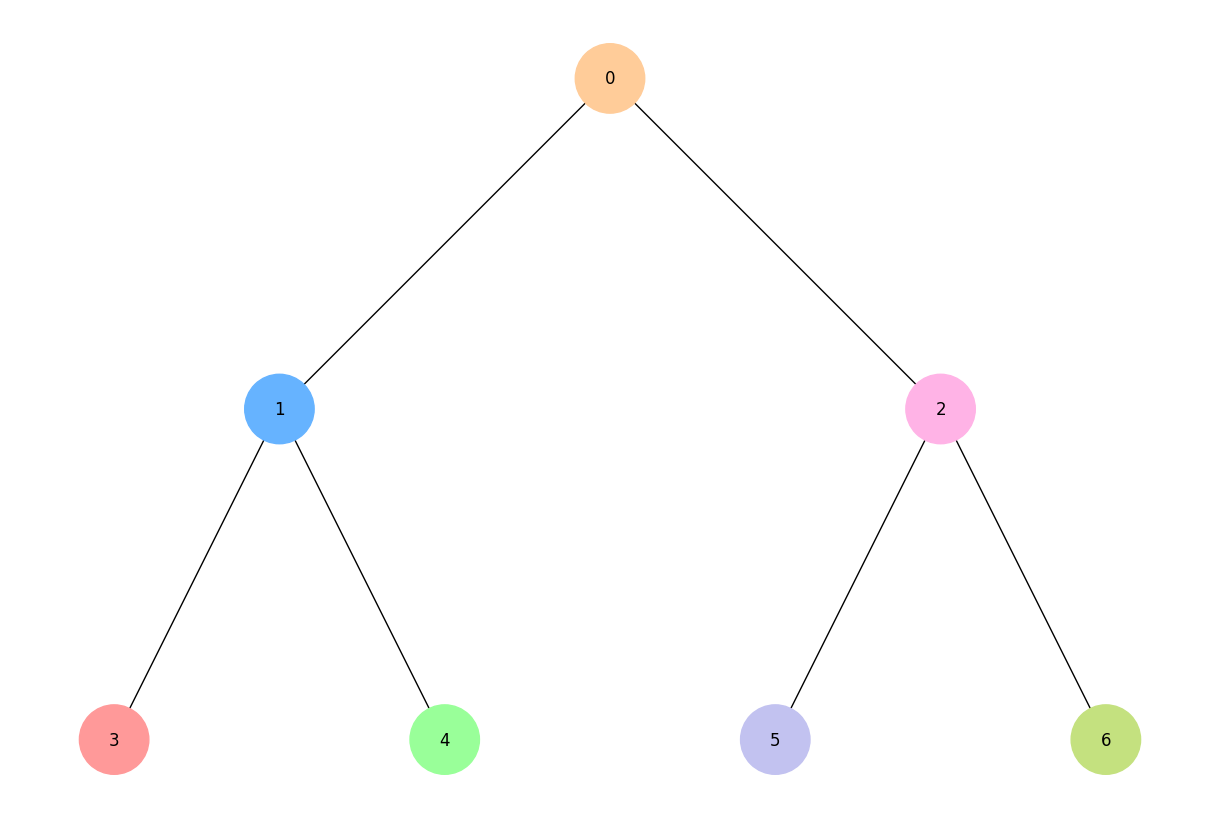

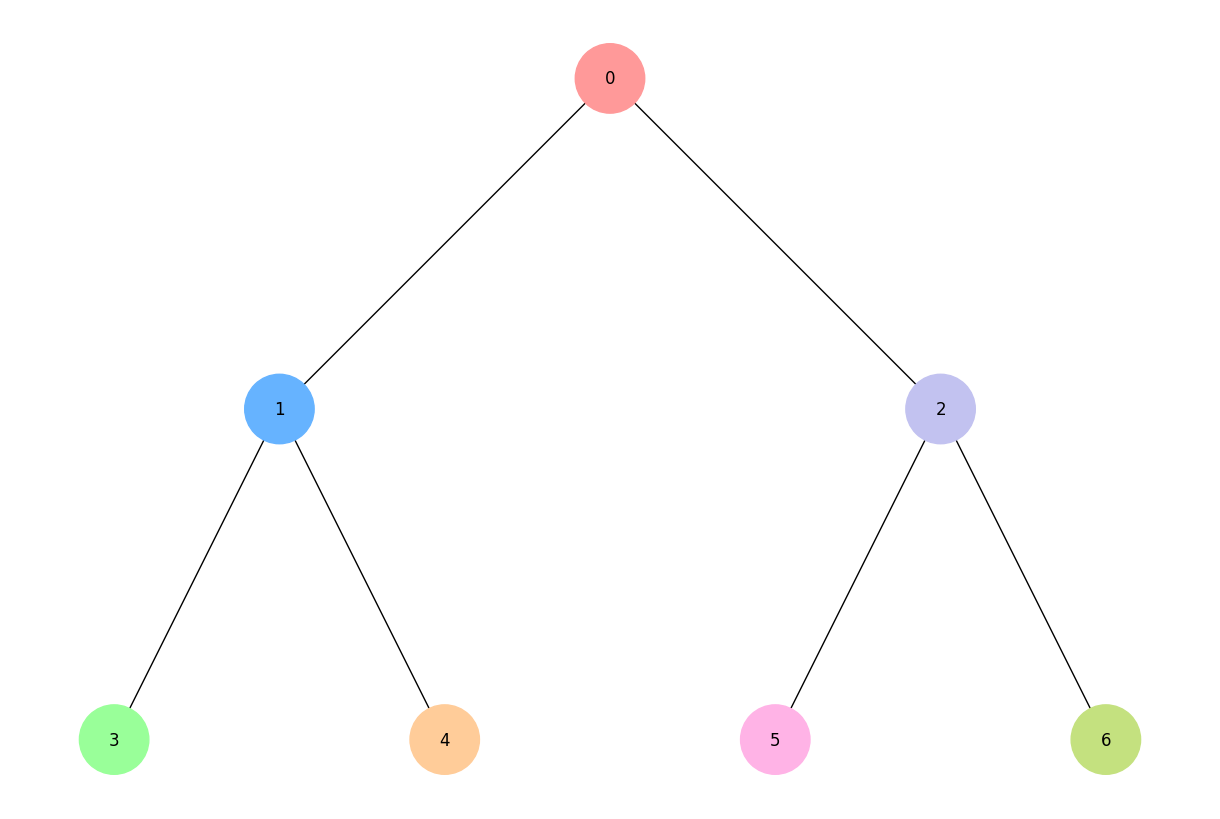

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value, color="skyblue"):
        self.left_child = None
        self.right_child = None
        self.value = value
        self.color = color  # Attribute to store the color of the node

def build_graph(graph, node, pos, x=0, y=0, depth=1):
    if node is not None:
        graph.add_node(node.value, pos=(x, y), depth=depth, color=node.color)
        if node.left_child is not None:
            graph.add_edge(node.value, node.left_child.value)
            left_shift = 1 / depth
            build_graph(graph, node.left_child, pos, x-left_shift, y-1, depth+1)
        if node.right_child is not None:
            graph.add_edge(node.value, node.right_child.value)
            right_shift = 1 / depth
            build_graph(graph, node.right_child, pos, x+right_shift, y-1, depth+1)
    return graph

def display_tree(tree_root):
    graph = nx.DiGraph()
    pos = {}
    tree = build_graph(graph, tree_root, pos)

    node_colors = [node[1]['color'] for node in tree.nodes(data=True)]

    plt.figure(figsize=(12, 8))
    nx.draw(tree, pos=nx.get_node_attributes(tree, 'pos'), with_labels=True, arrows=False, node_size=2500, node_color=node_colors)
    plt.show()

def in_order_color(node, colors, counter):
    if node:
        in_order_color(node.left_child, colors, counter)
        node.color = colors[counter[0] % len(colors)]
        counter[0] += 1
        in_order_color(node.right_child, colors, counter)

def pre_order_color(node, colors, counter):
    if node:
        node.color = colors[counter[0] % len(colors)]
        counter[0] += 1
        pre_order_color(node.left_child, colors, counter)
        pre_order_color(node.right_child, colors, counter)

# Example usage
root = TreeNode(0)
root.left_child = TreeNode(1)
root.right_child = TreeNode(2)
root.left_child.left_child = TreeNode(3)
root.left_child.right_child = TreeNode(4)
root.right_child.left_child = TreeNode(5)
root.right_child.right_child = TreeNode(6)

# In-Order Traversal Visualization
color_palette = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c4e17f"]
counter = [0]
in_order_color(root, color_palette, counter)
display_tree(root)

# Pre-Order Traversal Visualization
counter = [0]
pre_order_color(root, color_palette, counter)
display_tree(root)

## Task 6: Greedy Algorithms and Dynamic Programming

It is necessary to write a Python program that uses two approaches — greedy algorithm and dynamic programming algorithm to solve the problem of choosing food with the highest total calorie content within a limited budget.

Each type of food has a specified cost and calorie content. Data about food is represented as a dictionary, where the key is the dish name, and the value is a dictionary with the cost and calorie content.
Develop a function greedy_algorithm for the greedy algorithm that selects dishes, maximizing the ratio of calories to cost without exceeding the specified budget.

To implement the dynamic programming algorithm, create a function dynamic_programming that calculates the optimal set of dishes to maximize calorie content within a given budget.

In [12]:
# Define items with their respective costs and calories
menu_items = {
    "pizza": {"price": 50, "calories": 300},
    "hamburger": {"price": 40, "calories": 250},
    "hot-dog": {"price": 20, "calories": 200},
    "pepsi": {"price": 10, "calories": 100},
    "cola": {"price": 15, "calories": 220},
    "potato": {"price": 25, "calories": 350}
}

def greedy_selection(menu_items, budget_limit):
    sorted_menu = sorted(menu_items.items(), key=lambda x: x[1]['calories'] / x[1]['price'], reverse=True)
    chosen_items = []
    total_calories = 0
    total_spent = 0

    for item, details in sorted_menu:
        if total_spent + details['price'] <= budget_limit:
            chosen_items.append(item)
            total_spent += details['price']
            total_calories += details['calories']

    return chosen_items, total_calories, total_spent

def dp_selection(menu_items, budget_limit):
    num_items = len(menu_items)
    dp_table = [[0 for _ in range(budget_limit + 1)] for _ in range(num_items + 1)]
    item_list = list(menu_items.items())

    for i in range(1, num_items + 1):
        for cost in range(budget_limit + 1):
            if item_list[i-1][1]['price'] <= cost:
                dp_table[i][cost] = max(item_list[i-1][1]['calories'] + dp_table[i-1][cost-item_list[i-1][1]['price']], dp_table[i-1][cost])
            else:
                dp_table[i][cost] = dp_table[i-1][cost]

    total_calories = dp_table[num_items][budget_limit]
    cost = budget_limit
    chosen_items = []

    for i in range(num_items, 0, -1):
        if total_calories <= 0:
            break
        if total_calories == dp_table[i-1][cost]:
            continue
        else:
            chosen_items.append(item_list[i-1][0])
            total_calories -= item_list[i-1][1]['calories']
            cost -= item_list[i-1][1]['price']

    total_spent = budget_limit - cost
    return chosen_items, dp_table[num_items][budget_limit], total_spent

# Example usage
budget_limit = 100

# Greedy algorithm results
items_greedy, calories_greedy, cost_greedy = greedy_selection(menu_items, budget_limit)
print(f"Greedy Selection: {items_greedy}, Total Calories: {calories_greedy}, Total Cost: {cost_greedy}")

# Dynamic programming results
items_dp, calories_dp, cost_dp = dp_selection(menu_items, budget_limit)
print(f"Dynamic Programming Selection: {items_dp}, Total Calories: {calories_dp}, Total Cost: {cost_dp}")

Greedy Selection: ['cola', 'potato', 'hot-dog', 'pepsi'], Total Calories: 870, Total Cost: 70
Dynamic Programming Selection: ['potato', 'cola', 'hot-dog', 'hamburger'], Total Calories: 1020, Total Cost: 100


## Task 7: Using the Monte Carlo Method

It is necessary to write a Python program that simulates a large number of dice throws, calculates the sums of numbers that appear on the dice, and determines the probability of each possible sum.

Create a simulation where two dice are thrown a large number of times. For each throw, determine the sum of the numbers that appeared on both dice. Count how many times each possible sum (from 2 to 12) appears in the simulation. Using this data, calculate the probability of each sum.

Based on the simulations, create a table or graph displaying the probabilities of each sum identified using the Monte Carlo method.

The table of probabilities of sums when throwing two dice looks as follows.

{2: 0.0312, 3: 0.0595, 4: 0.0783, 5: 0.1163, 6: 0.1408, 7: 0.1675, 8: 0.1381, 9: 0.1042, 10: 0.0825, 11: 0.0546, 12: 0.027}


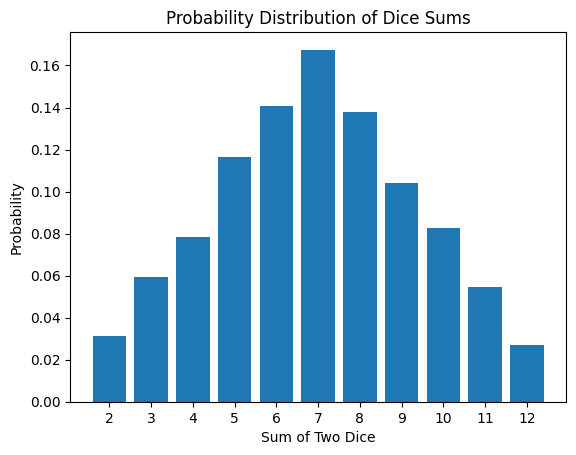

In [14]:
import random
import matplotlib.pyplot as plt

def simulate_dice_throws(num_throws):
    # Dictionary to store the count of each possible outcome
    result_counts = {i: 0 for i in range(2, 13)}

    # Simulate dice throws
    for _ in range(num_throws):
        roll_sum = random.randint(1, 6) + random.randint(1, 6)
        result_counts[roll_sum] += 1

    # Calculate probabilities
    for key in result_counts:
        result_counts[key] /= num_throws

    return result_counts

def display_probabilities(result_counts):
    sums = list(result_counts.keys())
    probabilities = list(result_counts.values())

    # Plot the probabilities as a bar chart
    plt.bar(sums, probabilities, tick_label=sums)
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of Dice Sums')
    plt.show()

# Example usage
number_of_throws = 10000
dice_outcomes = simulate_dice_throws(number_of_throws)
print(dice_outcomes)
display_probabilities(dice_outcomes)